# 📊 Задание: Построение и оценка моделей машинного обучения для классификации

## 🎯 Цели задания:
1. Загрузка и анализ данных
2. Работа с пропущенными значениями и типами данных
3. Масштабирование признаков
4. Кодирование категориальных признаков
5. Построение и сравнение моделей  KNN Classifier
6. Кросс-валидация лучшей модели
7. Подбор наилучших параметов для KNN Classifier

---

### 🔹 Шаг 1: Загрузка и первичный анализ данных
- Cкачайте датасет
- Выведите количество строк и столбцов 📊.
- Проанализируйте, что означает каждый столбец 🔍 и выведите описание.

### 🔹 Шаг 2: Проверка данных на пропуски и типы данных
- Проверьте, нет ли пропущенных значений в датасете ❓.
- Проверьте типы данных каждого столбца, чтобы убедиться, что числовые колонки — это `int` или `float`, а категориальные — `object` ⚙️.
- Выведите количество уникальных значений в каждом столбце и оцените, можно ли использовать этот столбец для моделирования 📈.
- Выведите средний возраст для каждого уникального значения в поле education. Средний возраст secondary, tertiary, etc. Сделайте вывод, нет ли ошибки в данных.

### 🔹 Шаг 3: Разделение данных на train и test
- Разделите данные на обучающую и тестовую выборки (train и test) 🧩.
- Выведите числовую характеристику целевой переменной `y_train` и `y_test` с помощью метода `.describe()` 📊.


### 🔹 Шаг 4: Масштабирование признаков
- Сделайте масштабирование числовых признаков с помощью `StandardScaler` 🔄.
- Сравните числовую характеристику признаков до и после масштабирования с использованием метода `.describe()` 🔍.


### 🔹 Шаг 5: Кодирование категориальных признаков
Создайте три копии датасета и сделайте кодирование категориальных признаков:
- Используйте `LabelEncoder` 🏷️.
- Используйте `OneHotEncoder` 🎨.
- Используйте `Target Mean Encoder` 🎯.

Делаем fit_transform на трейне, transform на тесте. Обязательно сделать с использованием Pipeline. Пример тут
https://colab.research.google.com/drive/1Z8b1xCIdQvKXZgUvZLWLWfVAMrHKg8dB?usp=sharing

### 🔹 Шаг 6: Построение и оценка моделей
- Постройте три модели KNN classifier для каждого из полученных датасетов 🛠️.
- Оцените качество на тестовой выборке по следующим метрикам:
  - **Accuracy** (Точность) 📊
  - **Precision** 🧮
  - **Recall** 📈
  - **F1 Score** (Гармоническое среднее Precision и Recall) ⚖️
  - **ROC-AUC** (Площадь под кривой ошибок) 🔢

Создайте таблицу для сравнения результатов трёх моделей по этим метрикам 📊.

### 🔹 Шаг 7: Кросс-валидация лучшей модели
- Выберите лучшую модель по результатам оценки 🏆.
- Проведите кросс-валидацию на 5 фолдах и выведите среднее значение и стандартное отклонение метрики ROC-AUC на кросс-валидации 📉.
- Сравните качество модели на кросс-валидации с качеством на отложенной тестовой выборке 🧐.

### 🔹 Шаг 8:  Поиск оптимальных параметров для KNN Classifier
- Запустите цикл для поиска оптимального количества соседей(1-10), weights, metric, algorithm и выберите лучшую комбинацию параметров по метрике **ROC-AUC** 🔄. Используйте itertools.combinations и напишите функцию, которая принимает на вход модель, список параметов в виде словаря, метрику оценки и находит лучшую комбинацию параметров для заданной метрики. Используйте typing при написании функции.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

from category_encoders import TargetEncoder, OneHotEncoder, OrdinalEncoder

# 🔹 Шаг 1: Загрузка и первичный анализ данных
- Cкачайте датасет
- Выведите количество строк и столбцов 📊.
- Проанализируйте, что означает каждый столбец 🔍 и выведите описание.


In [98]:
df = pd.read_csv("../datasets/bank.csv", sep=';')
df
print(f"Количество строк:\t{df.shape[0]}\nКоличество столбцов:\t{df.shape[1]}")
df.sample(20)

Количество строк:	4521
Количество столбцов:	17


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3182,36,blue-collar,married,secondary,no,1554,yes,no,unknown,12,may,325,4,-1,0,unknown,no
3030,53,blue-collar,married,secondary,no,65,no,no,cellular,28,aug,25,18,-1,0,unknown,no
4303,46,technician,single,secondary,no,834,yes,no,cellular,11,jul,196,2,-1,0,unknown,no
1176,50,management,married,tertiary,no,-470,yes,no,cellular,8,may,506,2,170,3,failure,no
1776,43,management,married,secondary,no,17555,no,no,cellular,26,aug,14,14,-1,0,unknown,no
1121,51,entrepreneur,married,tertiary,no,5403,no,no,unknown,6,jun,42,1,-1,0,unknown,no
4220,33,blue-collar,single,secondary,no,-416,yes,no,unknown,16,may,767,2,-1,0,unknown,yes
2925,52,blue-collar,divorced,primary,no,-97,yes,yes,unknown,9,may,167,4,-1,0,unknown,no
1126,77,retired,married,secondary,no,610,no,no,cellular,13,aug,766,3,-1,0,unknown,no
1059,57,retired,married,primary,no,808,no,no,telephone,7,jul,274,1,-1,0,unknown,no


In [99]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [100]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [101]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [102]:
df.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [103]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [104]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

### Описание переменных:

1. **age** – возраст клиента (числовое значение).
2. **job** – вид занятости (категориальное значение).
3. **marital** – семейное положение (категориальное значение).
4. **education** – уровень образования (категориальное значение).
5. **default** – наличие кредитного дефолта (значение "yes" или "no").
6. **balance** – баланс банковского счета клиента (числовое значение).
7. **housing** – наличие жилищного кредита (значение "yes" или "no").
8. **loan** – наличие потребительского кредита (значение "yes" или "no").
9. **contact** – тип контактной связи с клиентом (категориальное значение).
10. **day** – день месяца, когда клиент был последний раз контактирован (числовое значение).
11. **month** – месяц последнего контакта с клиентом (категориальное значение).
12. **duration** – длительность последнего контакта (в секундах).
13. **campaign** – количество контактов в текущей маркетинговой кампании.
14. **pdays** – количество дней с момента последнего контакта (-1 означает, что контакта не было).
15. **previous** – количество контактов до текущей маркетинговой кампании.
16. **poutcome** – результат предыдущей маркетинговой кампании (категориальное значение).
17. **y** – целевая переменная, обозначающая, согласился ли клиент на депозитное предложение (значение "yes" или "no").


# 🔹 Шаг 2: Проверка данных на пропуски и типы данных
- Проверьте, нет ли пропущенных значений в датасете ❓.
- Проверьте типы данных каждого столбца, чтобы убедиться, что числовые колонки — это `int` или `float`, а категориальные — `object` ⚙️.
- Выведите количество уникальных значений в каждом столбце и оцените, можно ли использовать этот столбец для моделирования 📈.
- Выведите средний возраст для каждого уникального значения в поле education. Средний возраст secondary, tertiary, etc. Сделайте вывод, нет ли ошибки в данных.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [106]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [107]:
df.dtypes.sort_values()

age           int64
previous      int64
pdays         int64
campaign      int64
duration      int64
balance       int64
day           int64
month        object
contact      object
loan         object
housing      object
default      object
education    object
marital      object
job          object
poutcome     object
y            object
dtype: object

In [108]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [109]:
df.select_dtypes("object").nunique().sort_values()

default       2
housing       2
loan          2
y             2
marital       3
contact       3
education     4
poutcome      4
job          12
month        12
dtype: int64

In [110]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [111]:
df.select_dtypes(exclude="object").nunique().sort_values()

previous      24
day           31
campaign      32
age           67
pdays        292
duration     875
balance     2353
dtype: int64

In [112]:
df.day.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [113]:
df.duration.sort_values().unique()

array([   4,    5,    6,    7,    8,    9,   10,   11,   12,   13,   14,
         15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,
         26,   27,   28,   29,   30,   31,   32,   33,   34,   35,   36,
         37,   38,   39,   40,   41,   42,   43,   44,   45,   46,   47,
         48,   49,   50,   51,   52,   53,   54,   55,   56,   57,   58,
         59,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
         70,   71,   72,   73,   74,   75,   76,   77,   78,   79,   80,
         81,   82,   83,   84,   85,   86,   87,   88,   89,   90,   91,
         92,   93,   94,   95,   96,   97,   98,   99,  100,  101,  102,
        103,  104,  105,  106,  107,  108,  109,  110,  111,  112,  113,
        114,  115,  116,  117,  118,  119,  120,  121,  122,  123,  124,
        125,  126,  127,  128,  129,  130,  131,  132,  133,  134,  135,
        136,  137,  138,  139,  140,  141,  142,  143,  144,  145,  146,
        147,  148,  149,  150,  151,  152,  153,  1

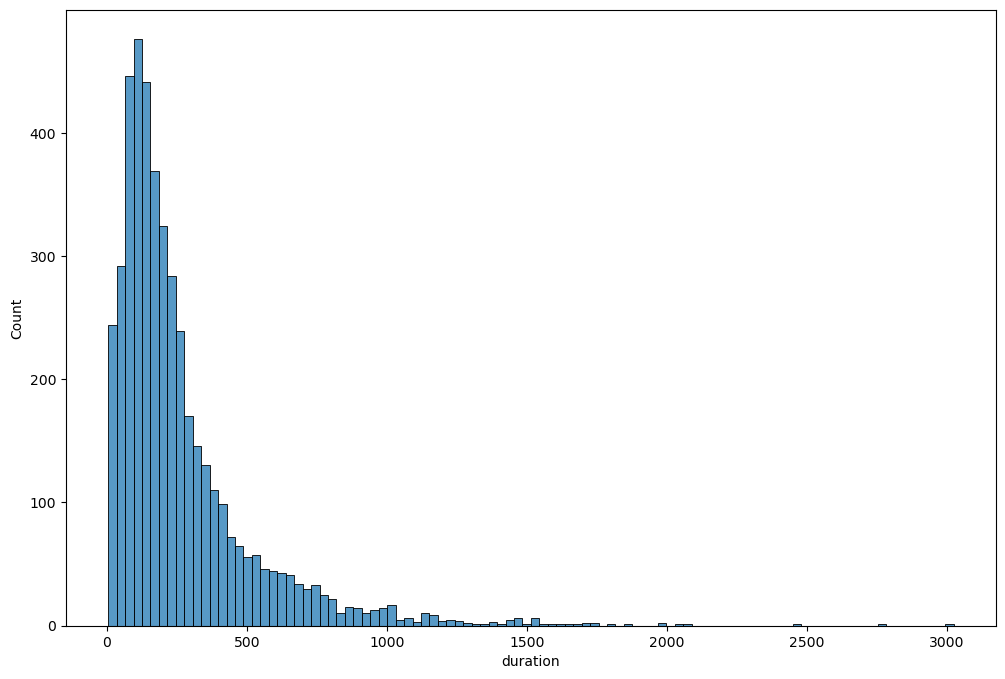

In [114]:
plt.figure(figsize=(12,8))
sns.histplot(df.duration, bins=100);

### Оценка пригодности столбцов для моделирования
- **Все столбцы можно использовать**, но некоторые требуют предобработки:
  - `pdays`: можно заменить на бинарный признак.
  - `duration`: можно исключить при прогнозировании, так как он известен **только после звонка**, но все значения для него известны, поэтому можно и оставить.
  - `day`: малополезен, но можно протестировать.
  - `month`: можно использовать для учета сезонности.

В целом, данные готовы для моделирования.

- Выведите средний возраст для каждого уникального значения в поле education. Средний возраст secondary, tertiary, etc. Сделайте вывод, нет ли ошибки в данных.

In [115]:
df.groupby("education", as_index=False).aggregate({"age":"mean"})

,education,age
0,primary,46.833333
1,secondary,40.062446
2,tertiary,39.645926
3,unknown,45.299465


In [116]:
df.age.sort_values().unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87],
      dtype=int64)

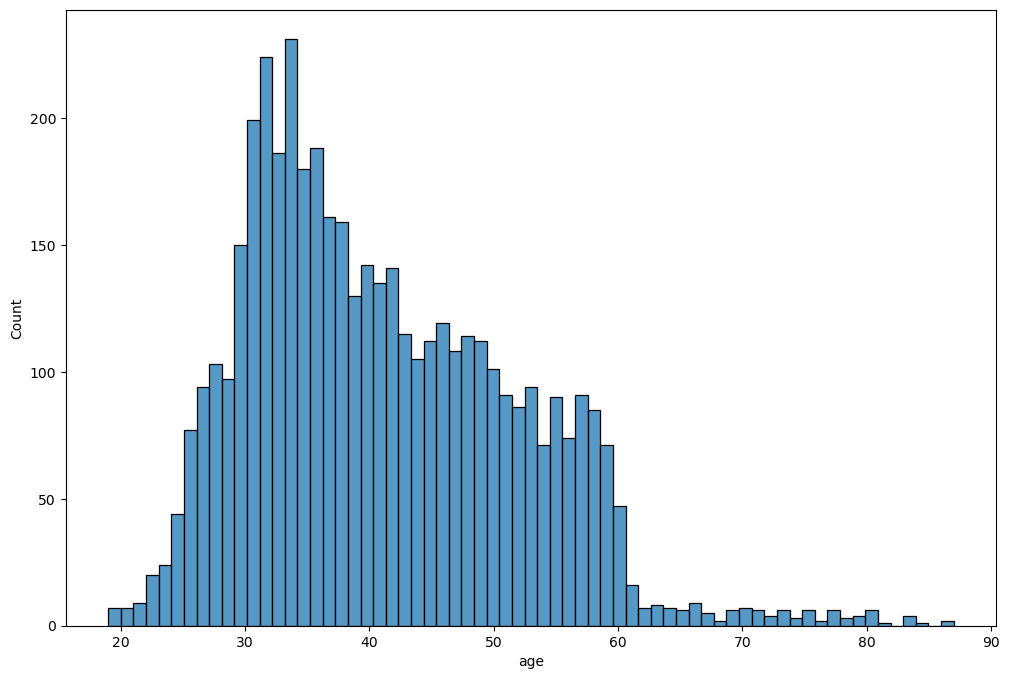

In [117]:
plt.figure(figsize=(12,8))
sns.histplot(df.age, bins=df.age.nunique());

1. **Средний возраст по уровням образования (`education`)**:
   - **Primary**: 46.83
   - **Secondary**: 40.66
   - **Tertiary**: 39.65
   - **Unknown**: 45.30

2. **Уникальные значения возраста (`age`)**:
   - Возраст варьируется от **19 до 87 лет**.
   - Нет очевидных выбросов или некорректных значений (например, отрицательных возрастов или нереалистичных значений).

### **Вывод о корректности данных**:
 Ошибок в данных **не выявлено**.  
- Средний возраст для разных уровней образования **логичен**: люди с более высоким образованием (tertiary) в среднем **моложе**, чем те, у кого **primary**. Это может объясняться тем, что люди с высшим образованием начинают работать позже.
- Разница в средних возрастах **реалистична** и **не указывает на аномалии**.


# 🔹 Шаг 3: Разделение данных на train и test
- Разделите данные на обучающую и тестовую выборки (train и test) 🧩.
- Выведите числовую характеристику целевой переменной `y_train` и `y_test` с помощью метода `.describe()` 📊.

In [152]:
X = df.drop('y', axis=1)
y = df[["y"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размеры данных: \n X_train: {X_train.shape} \n X_test:  {X_test.shape} \n y_train: {y_train.shape} \n y_test:  {y_test.shape}")

Размеры данных: 
 X_train: (3164, 16) 
 X_test:  (1357, 16) 
 y_train: (3164, 1) 
 y_test:  (1357, 1)


In [153]:
print("y_train:")
display(y_train.describe())

print("\ny_test:")
display(y_test.describe())

y_train:


,y
count,3164
unique,2
top,no
freq,2795



y_test:


,y
count,1357
unique,2
top,no
freq,1205


# 🔹 Шаг 4: Масштабирование признаков
- Сделайте масштабирование числовых признаков с помощью `StandardScaler` 🔄.
- Сравните числовую характеристику признаков до и после масштабирования с использованием метода `.describe()` 🔍.

In [154]:
scaler = StandardScaler()

numeric_features = X.select_dtypes(include='number').columns.tolist()

X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_features)


In [155]:
print("X_train до масштабирования числовых признаков: ")
X_train.select_dtypes(include='number').describe().round(2)

X_train до масштабирования числовых признаков: 


,age,balance,day,duration,campaign,pdays,previous
count,3164.00,3164.00,3164.00,3164.00,3164.00,3164.00,3164.00
mean,41.23,1396.83,16.04,262.77,2.89,38.65,0.54
std,10.69,2733.30,8.20,254.30,3.35,97.63,1.71
min,19.00,-1746.00,1.00,5.00,1.00,-1.00,0.00
25%,33.00,70.00,9.00,103.75,1.00,-1.00,0.00
50%,39.00,449.00,16.00,184.50,2.00,-1.00,0.00
75%,49.00,1518.25,21.00,332.00,3.00,-1.00,0.00
max,87.00,27359.00,31.00,2769.00,50.00,871.00,24.00


In [156]:
print("X_train после масштабирования числовых признаков: ")
X_train_scaled.describe().round(2)

X_train после масштабирования числовых признаков: 


,age,balance,day,duration,campaign,pdays,previous
count,3164.00,3164.00,3164.00,3164.00,3164.00,3164.00,3164.00
mean,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.08,-1.15,-1.83,-1.01,-0.56,-0.41,-0.32
25%,-0.77,-0.49,-0.86,-0.63,-0.56,-0.41,-0.32
50%,-0.21,-0.35,-0.00,-0.31,-0.26,-0.41,-0.32
75%,0.73,0.04,0.61,0.27,0.03,-0.41,-0.32
max,4.28,9.50,1.82,9.86,14.07,8.53,13.70


In [157]:
print("X_test до масштабирования числовых признаков: ")
X_test.select_dtypes(include='number').describe().round(2)

X_test до масштабирования числовых признаков: 


,age,balance,day,duration,campaign,pdays,previous
count,1357.00,1357.00,1357.00,1357.00,1357.00,1357.00,1357.00
mean,41.03,1482.88,15.63,266.75,2.58,42.36,0.55
std,10.32,3572.29,8.35,272.44,2.45,105.69,1.65
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,66.00,8.00,107.00,1.00,-1.00,0.00
50%,39.00,438.00,16.00,187.00,2.00,-1.00,0.00
75%,49.00,1387.00,21.00,321.00,3.00,-1.00,0.00
max,84.00,71188.00,31.00,3025.00,25.00,808.00,25.00


In [158]:
print("X_test после масштабирования числовых признаков: ")
X_test_scaled.describe().round(2)

X_test после масштабирования числовых признаков: 


,age,balance,day,duration,campaign,pdays,previous
count,1357.00,1357.00,1357.00,1357.00,1357.00,1357.00,1357.00
mean,-0.02,0.03,-0.05,0.02,-0.09,0.04,0.00
std,0.97,1.31,1.02,1.07,0.73,1.08,0.96
min,-2.08,-1.72,-1.83,-1.02,-0.56,-0.41,-0.32
25%,-0.77,-0.49,-0.98,-0.61,-0.56,-0.41,-0.32
50%,-0.21,-0.35,-0.00,-0.30,-0.26,-0.41,-0.32
75%,0.73,-0.00,0.61,0.23,0.03,-0.41,-0.32
max,4.00,25.54,1.82,10.86,6.60,7.88,14.29


### 🔹 Шаг 5: Кодирование категориальных признаков
Создайте три копии датасета и сделайте кодирование категориальных признаков:
- Используйте `LabelEncoder` 🏷️.
- Используйте `OneHotEncoder` 🎨.
- Используйте `Target Mean Encoder` 🎯.

Делаем fit_transform на трейне, transform на тесте. Обязательно сделать с использованием Pipeline. Пример тут
https://colab.research.google.com/drive/1Z8b1xCIdQvKXZgUvZLWLWfVAMrHKg8dB?usp=sharing

In [159]:
X_train[numeric_features] = X_train_scaled.values
X_test[numeric_features] = X_test_scaled.values

In [160]:
categorical_features = X_train.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
categorical_transformer_le = OrdinalEncoder()
categorical_transformer_he = OneHotEncoder(handle_unknown='ignore')
categorical_transformer_te = TargetEncoder()

# X_train_le = X_train.copy()
# X_test_le = X_test.copy()

# X_train_he = X_train.copy()
# X_test_he = X_test.copy()

# X_train_te = X_train.copy()
# X_test_te = X_test.copy()

In [161]:
preprocessor_le = ColumnTransformer([
    ('cat_le', categorical_transformer_le, categorical_features)
])

preprocessor_he = ColumnTransformer([
    ('cat_he', categorical_transformer_he, categorical_features)
])

preprocessor_te = ColumnTransformer([
    ('cat_te', categorical_transformer_te, categorical_features)
])

In [162]:
pipeline_le = Pipeline([
    ('preprocessor', preprocessor_le),
    ('classifier', KNeighborsClassifier())
])

pipeline_he = Pipeline([
    ('preprocessor', preprocessor_he),
    ('classifier', KNeighborsClassifier())
])

pipeline_te = Pipeline([
    ('preprocessor', preprocessor_te),
    ('classifier', KNeighborsClassifier())
])

In [163]:
pipeline_le.fit(X_train, y_train)

C:\Users\b_jumaev\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_le', OrdinalEncoder(),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [164]:
pipeline_he.fit(X_train, y_train)

C:\Users\b_jumaev\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_he',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [165]:
pipeline_te.fit(X_train, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [185]:
encoder = TargetEncoder()
encoder.fit_transform(X_train[categorical_features], y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [176]:
X_train[categorical_features].groupby("job").count()

,marital,education,default,housing,loan,contact,month,poutcome
job,,,,,,,,
admin.,319,319,319,319,319,319,319,319
blue-collar,655,655,655,655,655,655,655,655
entrepreneur,108,108,108,108,108,108,108,108
housemaid,79,79,79,79,79,79,79,79
management,680,680,680,680,680,680,680,680
retired,172,172,172,172,172,172,172,172
self-employed,136,136,136,136,136,136,136,136
services,299,299,299,299,299,299,299,299
student,61,61,61,61,61,61,61,61


In [179]:
y_train.groupby('y', as_index=False).count()

,y
0,no
1,yes


In [ ]:
# Копирую данные
X_te = X_scaled.copy()

# Создаю объект класса TargetEncoder
te = TargetEncoder()

# Делаю преобразование TargetEncoder
X_te[cat_columns] = te.fit_transform(X_te[cat_columns], y)

# Проверяю результат
X_te

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
encoder = TargetEncoder()
encoder.fit_transform(X_train[categorical_features], y_train)

In [187]:
import pandas as pd
from category_encoders import TargetEncoder

# Создаём DataFrame с категориальными признаками
data = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago', 'Los Angeles', 'New York'],
    'Size': ['Large', 'Medium', 'Small', 'Large', 'Small', 'Medium', 'Large'],
    'Price': [500000, 450000, 300000, 520000, 310000, 460000, 530000]  # Целевая переменная (y)
})

# Разделяем X (признаки) и y (целевая переменная)
X = data[['City', 'Size']]  # Категориальные признаки
y = data['Price']  # Целевая переменная

# Создаём TargetEncoder
encoder = TargetEncoder()

# Обучаем кодировщик на тренировочных данных и трансформируем их
X_encoded = encoder.fit_transform(X, y)

# Выводим результат
print("Исходные данные:")
print(X)
print("\nЗакодированные данные (Target Encoding):")
print(X_encoded)



Исходные данные:
          City    Size
0     New York   Large
1  Los Angeles  Medium
2      Chicago   Small
3     New York   Large
4      Chicago   Small
5  Los Angeles  Medium
6     New York   Large

Закодированные данные (Target Encoding):
            City           Size
0  450634.430226  450634.430226
1  440901.838923  440901.838923
2  419624.179188  419624.179188
3  450634.430226  450634.430226
4  419624.179188  419624.179188
5  440901.838923  440901.838923
6  450634.430226  450634.430226


In [188]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

# Определяем кодировщик для категориальных признаков
preprocessor = ColumnTransformer([
    ('target_encoder', TargetEncoder(), ['City', 'Size'])
])

# Создаём Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3))
])

# Обучаем модель
model.fit(X, y)

# Делаем предсказания
y_pred = model.predict(X)
print("\nПредсказанные цены:")
print(y_pred)



Предсказанные цены:
[516666.66666667 470000.         353333.33333333 516666.66666667
 353333.33333333 470000.         516666.66666667]
